# Perceptron

In [47]:
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt

In [4]:
tf.random.set_seed(1)

## Generate fake separable data

In [44]:
def get_fake(samples, dimensions, epsilon):
    wfake = tf.random.normal(shape=(dimensions,))    # fake weights vector
    bfake = tf.random.normal(shape=(1,))             # fake bias
    wfake = wfake / tf.norm(wfake)                  # rescale weights to units

    # make linearly separable data by choosing labels accordingly
    X = tf.Variable(tf.zeros(shape=(samples, dimensions)))
    y = tf.Variable(tf.zeros(shape=(samples,)))

    i = 0
    while i < samples:
        tmp = tf.random.normal(shape=(1, dimensions))
        margin = tf.tensordot(tmp, wfake, axes=1) + bfake
        if tf.norm(tmp) < 3 and abs(margin) > epsilon:
            X.scatter_nd_update([i], tmp)
            y.scatter_nd_update([i], [1 if margin > 0 else -1])
            i += 1
    
    return X, y


## Plot the data

In [76]:
def plot_data(X, y):
    for (feature, label) in zip(X.numpy(), y.numpy()):
        if label == 1:
            plt.scatter(feature[0], feature[1], color='r')
        else:
            plt.scatter(feature[0], feature[1], color='b')

def plot_score(W, b):
    xgrid = np.arange(-3, 3, 0.02)
    ygrid = np.arange(-3, 3, 0.02)
    xx, yy = np.meshgrid(xgrid, ygrid)
    zz = np.zeros(shape=(xgrid.size, ygrid.size, 2))
    zz[:, :, 0] = np.array(xx)
    zz[:, :, 1] = np.array(yy)
    vv = np.dot(zz, W.numpy()) + b.numpy()
    CS = plt.contour(xgrid, ygrid, vv)
    plt.clabel(CS, inline=1, fontsize=10)

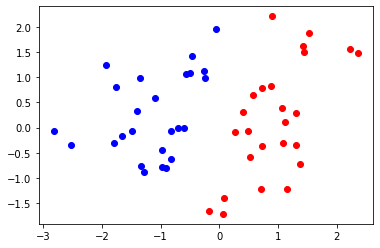

In [57]:
X, y = get_fake(50, 2, 0.3)
plot_data(X, y)
plt.show()

# The perceptron algorithm

In [75]:
def perceptron(W, b, X, y):
    if y * (tf.tensordot(W, X, axes=1) + b) <= 0:
        W.assign_add(y * X)
        b.assign_add([y])
        return 1
    return 0

Encountered an eror and updated parameters.
data: [-0.04940194  1.9642035 ], labels: -1.0
weight: [ 0.04940194 -1.9642035 ], bias: [-1.]


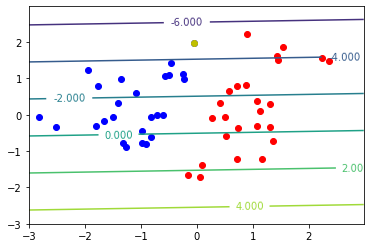

Encountered an eror and updated parameters.
data: [-0.9794695 -0.7738269], labels: -1.0
weight: [ 1.0288714 -1.1903765], bias: [-2.]


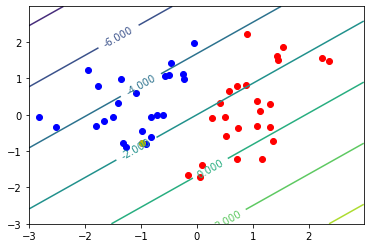

Encountered an eror and updated parameters.
data: [0.7220301  0.78337336], labels: 1.0
weight: [ 1.7509015  -0.40700316], bias: [-1.]


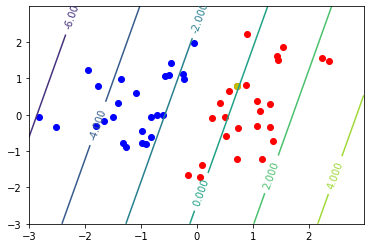

Encountered an eror and updated parameters.
data: [0.41017175 0.31518108], labels: 1.0
weight: [ 2.1610732  -0.09182209], bias: [0.]


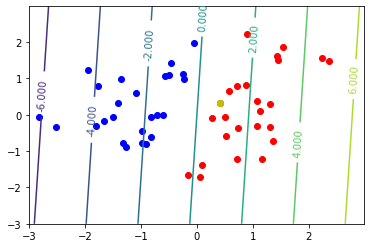

Encountered an eror and updated parameters.
data: [-0.16712412 -1.6582634 ], labels: 1.0
weight: [ 1.993949  -1.7500856], bias: [1.]


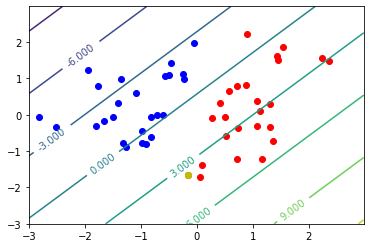

Encountered an eror and updated parameters.
data: [-0.82317924 -0.6168365 ], labels: -1.0
weight: [ 2.8171282 -1.133249 ], bias: [0.]


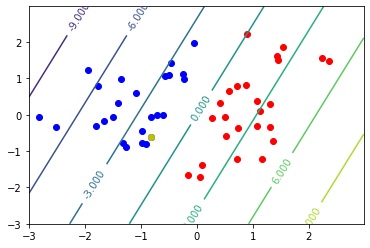

In [80]:
W = tf.Variable(tf.zeros(shape=(2,)))
b = tf.Variable(tf.zeros(shape=(1,)))

for (feature, label) in zip(X.numpy(), y.numpy()):
    res = perceptron(W, b, feature, label)
    if res == 1:
        print('Encountered an eror and updated parameters.')
        print('data: {}, labels: {}'.format(feature, label))
        print('weight: {}, bias: {}'.format(W.numpy(), b.numpy()))
        plot_score(W, b)
        plot_data(X, y)
        plt.scatter(feature[0], feature[1], color='y')
        plt.show()